<a href="https://colab.research.google.com/github/badshahah/Breast-Cancer-Detection/blob/main/CNN_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # 64x64 image with 3 color channels (RGB)
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the last convolutional layer
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(128, activation='relu'))

# Output layer for binary classification (sigmoid activation for 0 or 1)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [ ]:
# Set the path to your dataset directories
train_dir = '/content/drive/MyDrive/Thesis Data/Dataset BDFF/train'
val_dir = '/content/drive/MyDrive/Thesis Data/Dataset BDF/val' #Fixed the path
# Create an ImageDataGenerator for preprocessing the images
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize image pixels to [0,1]
    rotation_range=20,           # Random rotations
    width_shift_range=0.2,       # Random horizontal shifts
    height_shift_range=0.2,      # Random vertical shifts
    shear_range=0.2,             # Random shears
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Random flips
    fill_mode='nearest'          # Fill missing pixels
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directory for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),    # Resize images to 64x64
    batch_size=32,
    class_mode='binary'      # Binary classification
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


NameError: name 'ImageDataGenerator' is not defined

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Set the path to your dataset directories
train_dir = '/content/drive/MyDrive/Thesis Data/Dataset BDFF/train'
val_dir = '/content/drive/MyDrive/Thesis Data/Dataset BDF/val' #Fixed the path
# Create an ImageDataGenerator for preprocessing the images
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize image pixels to [0,1]
    rotation_range=20,           # Random rotations
    width_shift_range=0.2,       # Random horizontal shifts
    height_shift_range=0.2,      # Random vertical shifts
    shear_range=0.2,             # Random shears
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Random flips
    fill_mode='nearest'          # Fill missing pixels
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directory for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),    # Resize images to 64x64
    batch_size=32,
    class_mode='binary'      # Binary classification
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 1302 images belonging to 2 classes.
Found 372 images belonging to 2 classes.


In [ ]:
# Train the model with the training data and validation data
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 270ms/step - accuracy: 0.8112 - loss: 0.4339 - val_accuracy: 0.7955 - val_loss: 0.4805
Epoch 2/50
 1/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9688 - loss: 0.2441

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9688 - loss: 0.2441 - val_accuracy: 0.8000 - val_loss: 0.3853
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 192ms/step - accuracy: 0.9265 - loss: 0.2461 - val_accuracy: 0.9688 - val_loss: 0.0866
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2396 - val_accuracy: 0.9500 - val_loss: 0.1517
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.9388 - loss: 0.1891 - val_accuracy: 0.9801 - val_loss: 0.0633
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9375 - loss: 0.1320 - val_accuracy: 0.9500 - val_loss: 0.0938
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.9702 - loss: 0.1028 - val_accuracy: 0.9943 - val_loss: 0.0588
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0195 - val_accuracy: 1.0000 - val_loss: 0.0748
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9766 - loss: 0.0864 - val_accuracy: 0.9801 - val_los

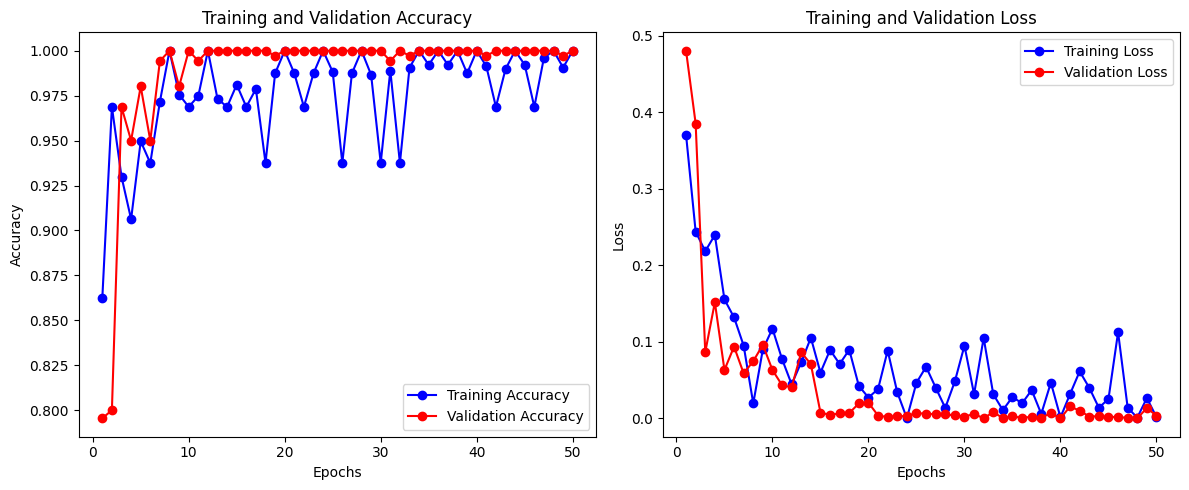

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy and loss from history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.9989 - loss: 0.0056
Validation Loss: 0.0117
Validation Accuracy: 0.9973


In [ ]:
# Create a new ImageDataGenerator for the test set (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the test data from the directory
test_dir = '/content/drive/MyDrive/Thesis Data/Dataset BDFF/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),   # Resize images to the same input size as training
    batch_size=32,
    class_mode='binary',    # Binary classification
    shuffle=False           # Don't shuffle to preserve the order of labels
)

Found 187 images belonging to 2 classes.


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.9648 - loss: 0.0375
Test Loss: 0.0195
Test Accuracy: 0.9840


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(true_labels, predicted_classes, target_names=test_generator.class_indices.keys()))

Confusion Matrix:
[[ 23   2]
 [  1 161]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.92      0.94        25
   Malignant       0.99      0.99      0.99       162

    accuracy                           0.98       187
   macro avg       0.97      0.96      0.96       187
weighted avg       0.98      0.98      0.98       187



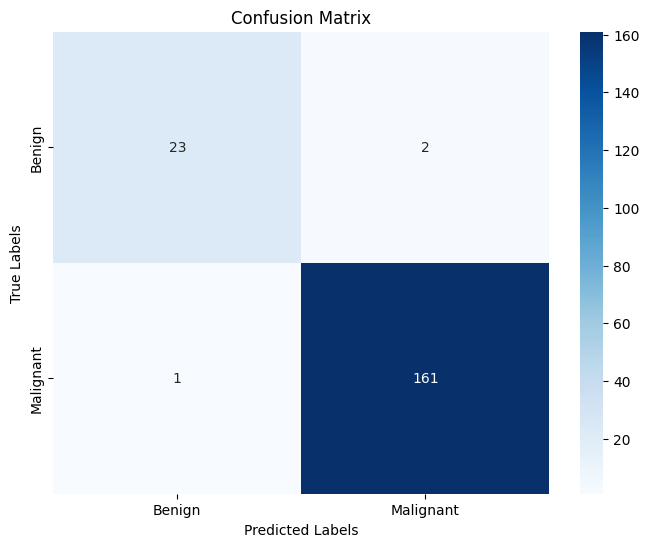

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
true_labels = test_generator.classes  # True labels from the test generator
predicted_classes = (predictions > 0.5).astype("int32").flatten()  # Binary predictions
cm = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
